In [234]:
import pandas as pd
filename = '/users/p00012387/SMUMSDS2016/data/Indicators.csv'
df_indicators = pd.read_csv(filename) # read in the csv file
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [235]:
df_flt = df_indicators[df_indicators.IndicatorCode.isin(['SL.TLF.CACT.MA.ZS','NY.GDP.MKTP.CD','NY.GDP.PCAP.CD','SP.ADO.TFRT'
                                                 ,'SG.GEN.PARL.ZS'])]
df_s = df_flt[['Year','CountryCode','IndicatorCode','Value']]
df_s =df_s.pivot_table(index=['CountryCode','Year'], columns=['IndicatorCode'], values=['Value'])


In [236]:
df_all = df_s['Value']

In [237]:
df_all.reset_index(inplace=True)
df_all.columns.name=None

# Global Dataframe

In [240]:
df_all

,CountryCode,Year,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SG.GEN.PARL.ZS,SL.TLF.CACT.MA.ZS,SP.ADO.TFRT
0,ABW,1960,NaN,NaN,NaN,NaN,106.2062
1,ABW,1961,NaN,NaN,NaN,NaN,102.8116
2,ABW,1962,NaN,NaN,NaN,NaN,99.4170
3,ABW,1963,NaN,NaN,NaN,NaN,94.4542
4,ABW,1964,NaN,NaN,NaN,NaN,89.4914
5,ABW,1965,NaN,NaN,NaN,NaN,84.5286
6,ABW,1966,NaN,NaN,NaN,NaN,79.5658
7,ABW,1967,NaN,NaN,NaN,NaN,74.6030
8,ABW,1968,NaN,NaN,NaN,NaN,71.6650
9,ABW,1969,NaN,NaN,NaN,NaN,68.7270


In [241]:
df_us = df_all[df_all['CountryCode']=='USA']
df_ch = df_all[df_all['CountryCode']=='CHN']
df_ru = df_all[df_all['CountryCode']=='RUS']

In [242]:
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sanjay659', api_key='frygs895x4')

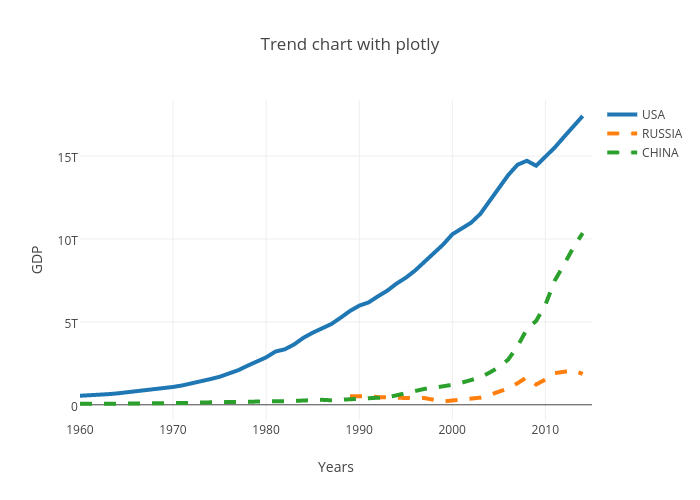

In [243]:
data = [
    go.Scatter(
    x=df_us['Year'], # assgin x as the 
    y=df_us['NY.GDP.MKTP.CD'],
    name='USA',
    line= dict(width=4)),    
    
    go.Scatter(
    x=df_ru['Year'],
    y=df_ru['NY.GDP.MKTP.CD'],
    name='RUSSIA',
    line= dict(width=4,dash='dash')),
        
    go.Scatter(
    x=df_ch['Year'],
    y=df_ch['NY.GDP.MKTP.CD'],
    name='CHINA',
    line= dict(width=4,dash='dash'))
    
]
layout = go.Layout(
    title='Trend chart with plotly',
    yaxis=dict(title='GDP'),
    xaxis=dict(title='Years')
)
fig= go.Figure(data=data, layout=layout)
url=py.iplot(fig, filename='pandas/WDI-GDP')
url

![WDI-GDP](images/basic-line-plot.png)

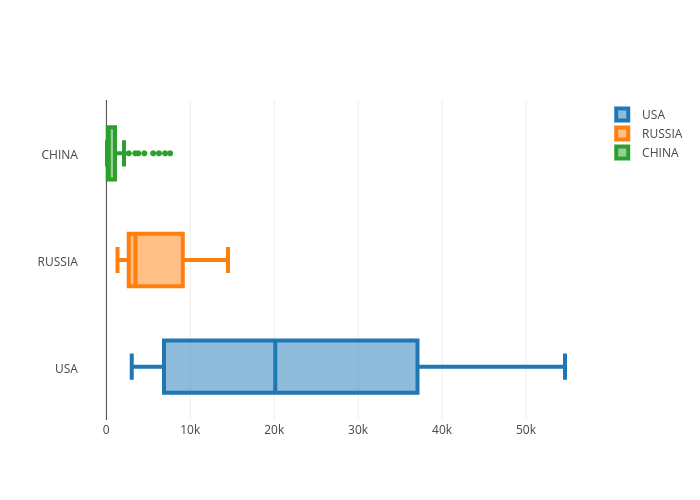

In [244]:
data = [
    go.Box(
    x=df_us['NY.GDP.PCAP.CD'],
    name='USA',
    line= dict(width=4)),    
    
    go.Box(
    x=df_ru['NY.GDP.PCAP.CD'],
    name='RUSSIA',
    line= dict(width=4,dash='dash')),
        
    go.Box(
    x=df_ch['NY.GDP.PCAP.CD'],
    name='CHINA',
    line= dict(width=4,dash='dash'))
    
]

fig= go.Figure(data=data)
url=py.iplot(fig, filename='pandas/WDI-GDP-Box')
url

![WDI-boxplot](images/WDI-GDP-Box.png)